In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [34]:
ip = pd.read_csv("data/aggregated_sensor.csv", index_col = 0)
ip = ip.sort_index()

In [114]:
for col in ip:
    ip[col] = ip[col].str.strip()

In [117]:
ip.device.unique()

array(['GPS', 'Accelerometer (raw)', 'Attitude', 'Gyrometer (smooth)',
       'Bluetooth', 'Acceleration (via User)', 'Altimeter (Barometer)',
       'Acceleration (via Gravity)', 'Cell Radio', 'Battery',
       'Device Orientation', 'Magnetometer (corrected for device)',
       'Proximity', 'Gyrometer (raw)', 'Acceleration (total)',
       'Magnetometer (raw)', 'Compass', 'Storage', 'Memory', 'Screen',
       'Device', 'WiFi', 'Microphone'], dtype=object)

In [36]:
#ip.loc[lambda r: r["data.name"] == "Latitude" | r["data.name"] == "Longitude", :]
GPS = ip.loc[(ip['data.name'] == "Latitude") | (ip['data.name'] == "Longitude"), :]

In [37]:
GPS['data.raw'] = pd.to_numeric(GPS['data.raw'])
GPS['data.display'] = pd.to_numeric(GPS['data.display'])
GPS.dtypes

/home/andrew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/andrew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


_user_id         object
data.display    float64
data.name        object
data.raw        float64
device           object
dtype: object

In [39]:
from datetime import *
GPS.index = GPS.index.to_datetime()
GPS.ix[datetime(2017, 3, 9):datetime(2017, 3, 11)]

/home/andrew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  if __name__ == '__main__':


In [51]:
lat = GPS.loc[GPS['data.name'] == 'Latitude']
lon = GPS.loc[GPS['data.name'] == 'Longitude']

In [53]:
latE = lat.loc[lat['_user_id'] == "Emil"]
lonE = lon.loc[lon['_user_id'] == "Emil"]

latG = lat.loc[lat['_user_id'] == "Glen"]
lonG = lon.loc[lon['_user_id'] == "Glen"]

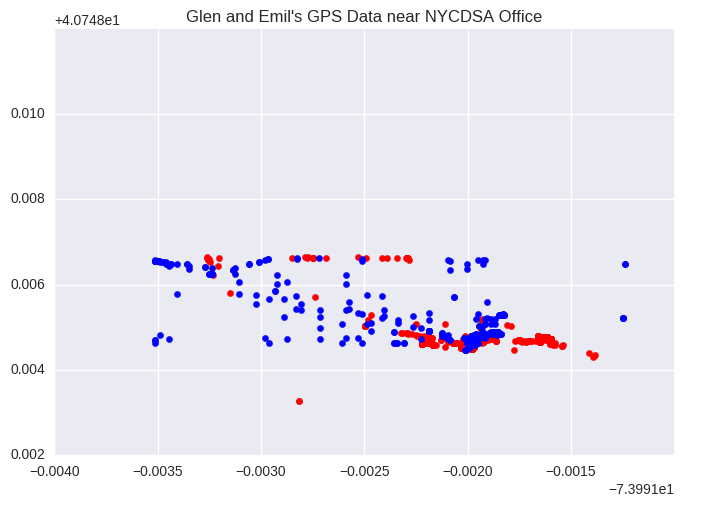

In [67]:
plt.scatter(lonE['data.raw'], latE['data.raw'], color = 'red')
plt.scatter(lonG['data.raw'], latG['data.raw'], color = 'blue')

plt.xlim(-73.995, -73.992)
plt.ylim(40.75, 40.76)
plt.title("Glen and Emil's GPS Data near NYCDSA Office")

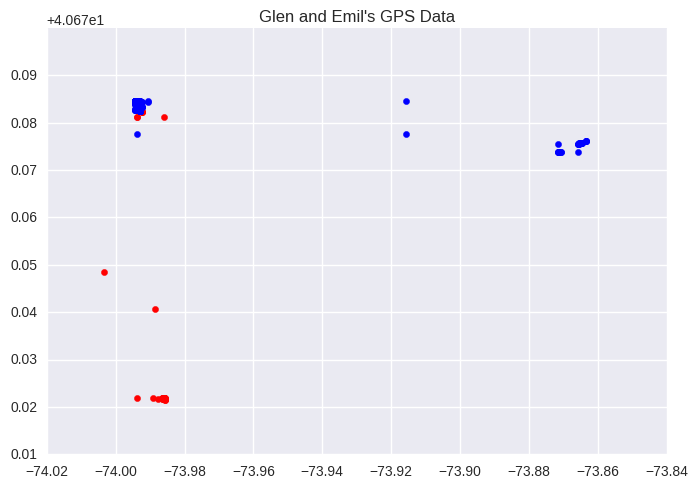

In [68]:
plt.scatter(lonE['data.raw'], latE['data.raw'], color = 'red')
plt.scatter(lonG['data.raw'], latG['data.raw'], color = 'blue')
plt.title("Glen and Emil's GPS Data")

In [88]:
GPS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4428 entries, 2017-03-08 10:38:48 to 2017-03-11 15:11:38
Data columns (total 5 columns):
_user_id        4428 non-null object
data.display    4428 non-null float64
data.name       4428 non-null object
data.raw        4428 non-null float64
device          4428 non-null object
dtypes: float64(2), object(3)
memory usage: 207.6+ KB


In [95]:
latE.ix['2017-03-11']

,_user_id,data.display,data.name,data.raw,device
2017-03-11 00:46:03,Emil,40.691864,Latitude,40.691864,GPS
2017-03-11 09:41:14,Emil,40.691605,Latitude,40.691605,GPS
2017-03-11 09:41:14,Emil,40.691861,Latitude,40.691861,GPS
2017-03-11 09:41:27,Emil,40.691861,Latitude,40.691861,GPS
2017-03-11 09:41:27,Emil,40.691861,Latitude,40.691861,GPS
2017-03-11 09:55:32,Emil,40.691861,Latitude,40.691861,GPS
2017-03-11 15:11:38,Emil,40.691872,Latitude,40.691872,GPS


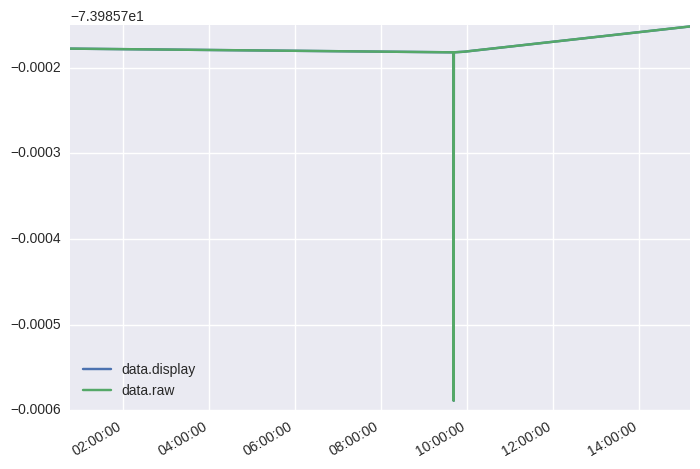

In [84]:
lonE.ix['2017-03-11'].plot()

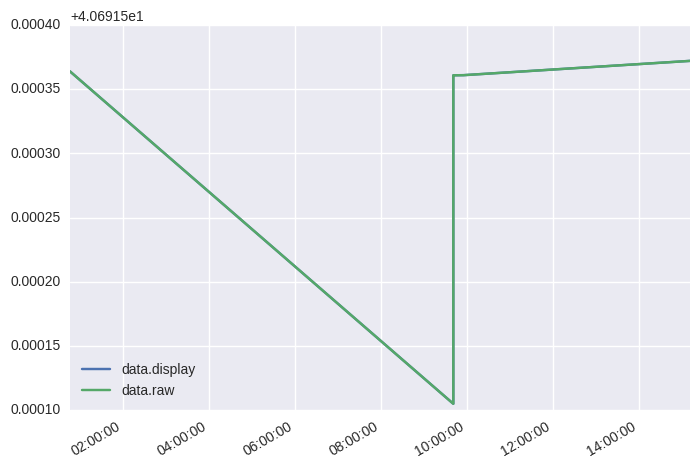

In [87]:
latE.ix['2017-03-11'].plot()

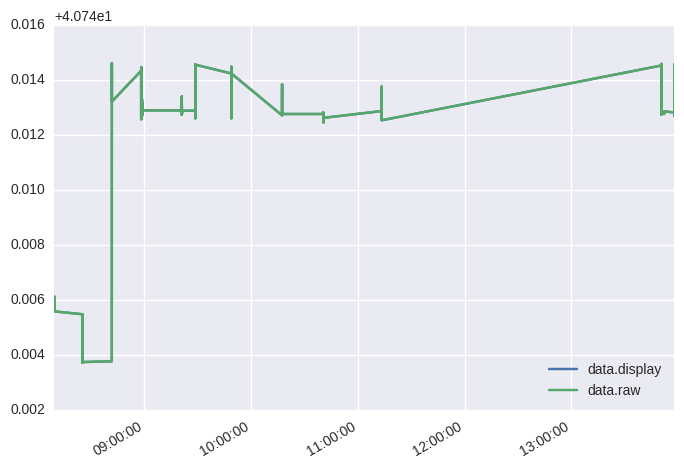

In [78]:
latG.plot()

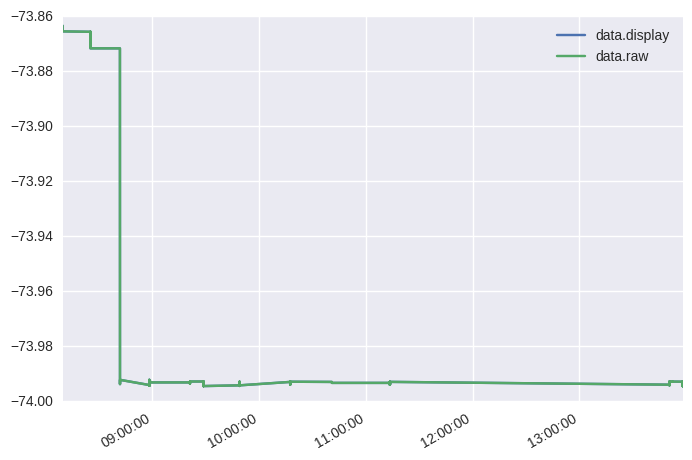

In [79]:
lonG.plot()

In [118]:
ip.device.unique()

array(['GPS', 'Accelerometer (raw)', 'Attitude', 'Gyrometer (smooth)',
       'Bluetooth', 'Acceleration (via User)', 'Altimeter (Barometer)',
       'Acceleration (via Gravity)', 'Cell Radio', 'Battery',
       'Device Orientation', 'Magnetometer (corrected for device)',
       'Proximity', 'Gyrometer (raw)', 'Acceleration (total)',
       'Magnetometer (raw)', 'Compass', 'Storage', 'Memory', 'Screen',
       'Device', 'WiFi', 'Microphone'], dtype=object)

In [128]:
mic = ip.loc[ip.device == "Microphone", :]

micG = mic.loc[mic._user_id == "Glen", :]
micE = mic.loc[mic._user_id == "Emil", :]

In [132]:
micE

,_user_id,data.display,data.name,data.raw,device
timestamp,,,,,
2017-03-08 12:14:21,Emil,-120 dB,Left Channel Level,-120.0,Microphone
2017-03-08 12:14:21,Emil,-120 dB,Right Channel Level,-120.0,Microphone
2017-03-08 12:14:24,Emil,-11.61505 dB,Left Channel Level,-11.615,Microphone
2017-03-08 12:14:24,Emil,-11.61505 dB,Right Channel Level,-11.615,Microphone
2017-03-08 12:14:32,Emil,-19.65159 dB,Left Channel Level,-19.6516,Microphone
2017-03-08 12:14:32,Emil,-19.65159 dB,Right Channel Level,-19.6516,Microphone
2017-03-08 12:14:40,Emil,-18.40502 dB,Left Channel Level,-18.405,Microphone
2017-03-08 12:14:40,Emil,-18.40502 dB,Right Channel Level,-18.405,Microphone
2017-03-08 12:14:45,Emil,-18.82247 dB,Left Channel Level,-18.8225,Microphone


In [156]:
micEleft = micE.loc[micE['data.name'] == "Left Channel Level", :]
micEright = micE.loc[micE['data.name'] == "Right Channel Level", :]

micGleft = micG.loc[micG['data.name'] == "Left Channel Level", :]
micGright = micG.loc[micG['data.name'] == "Right Channel Level", :]

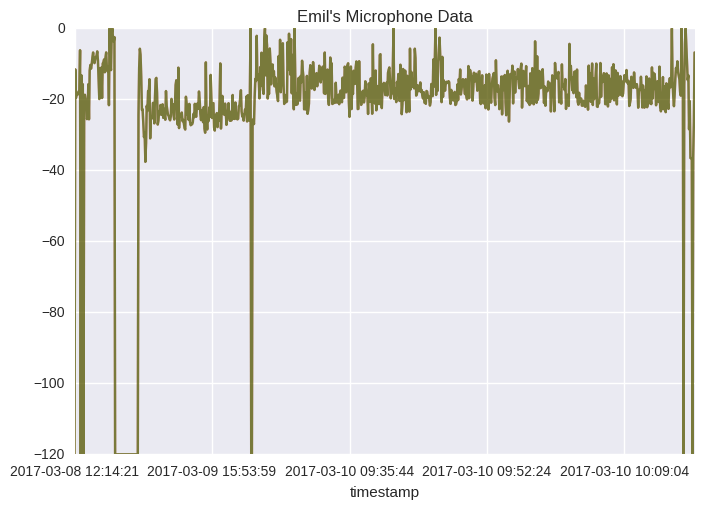

In [154]:
pd.to_numeric(micEleft['data.raw']).plot(color='red', alpha = .5)
pd.to_numeric(micEright['data.raw']).plot(color='green', alpha = .5)
plt.title("Emil's Microphone Data")

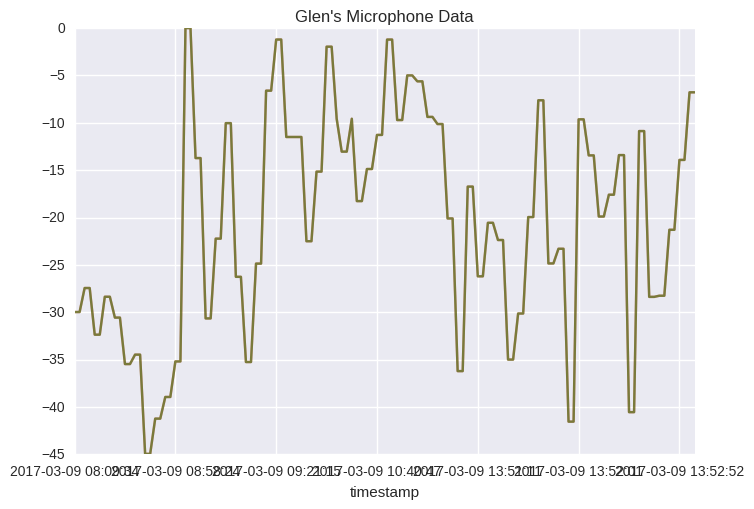

In [153]:
pd.to_numeric(micGleft['data.raw']).plot(color='red', alpha = .5)
pd.to_numeric(micGright['data.raw']).plot(color='green', alpha = .5)
plt.title("Glen's Microphone Data")